In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./songs.csv')
df.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [5]:
df.isna().sum()

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64

In [6]:
df.shape

(17734, 21)

In [7]:
cols_to_drop = [col for col in df.columns if df[col].isna().sum() / df.shape[0] > 0.7]
cols_to_drop  

['composer',
 'date_recorded',
 'information',
 'language_code',
 'lyricist',
 'publisher']

<Axes: >

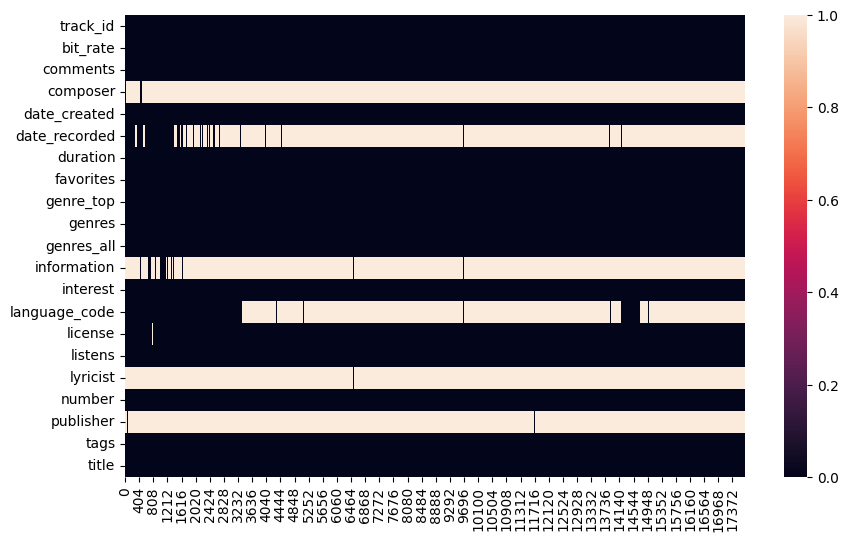

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose())

In [9]:
df = df.drop(columns=cols_to_drop)

In [10]:
df.isna().sum()

track_id         0
bit_rate         0
comments         0
date_created     0
duration         0
favorites        0
genre_top        0
genres           0
genres_all       0
interest         0
license         20
listens          0
number           0
tags             0
title            0
dtype: int64

In [11]:
license_mode = df['license'].mode().iloc[0]
license_mode

'Attribution-Noncommercial-No Derivative Works 3.0 United States'

In [12]:
df['license'] = df['license'].fillna(license_mode)
df['license'].isna().sum()

0

In [13]:
df.isna().sum()

track_id        0
bit_rate        0
comments        0
date_created    0
duration        0
favorites       0
genre_top       0
genres          0
genres_all      0
interest        0
license         0
listens         0
number          0
tags            0
title           0
dtype: int64

In [14]:
df['genre_top'].unique()

array(['Rock', 'Hip-Hop'], dtype=object)

In [15]:
df.head()

,track_id,bit_rate,comments,date_created,duration,favorites,genre_top,genres,genres_all,interest,license,listens,number,tags,title
0,135,256000,1,2008-11-26 01:43:26,837,0,Rock,"[45, 58]","[58, 12, 45]",2484,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,0,[],Father's Day
1,136,256000,1,2008-11-26 01:43:35,509,0,Rock,"[45, 58]","[58, 12, 45]",1948,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,0,[],Peel Back The Mountain Sky
2,151,192000,0,2008-11-26 01:44:55,192,0,Rock,[25],"[25, 12]",701,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,4,[],Untitled 04
3,152,192000,0,2008-11-26 01:44:58,193,0,Rock,[25],"[25, 12]",637,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,11,[],Untitled 11
4,153,256000,0,2008-11-26 01:45:00,405,5,Rock,[26],"[26, 12]",354,Attribution-NonCommercial-NoDerivatives (aka M...,424,2,[],Hundred-Year Flood


In [16]:
df = df.drop(columns=['track_id'])
df.head()

,bit_rate,comments,date_created,duration,favorites,genre_top,genres,genres_all,interest,license,listens,number,tags,title
0,256000,1,2008-11-26 01:43:26,837,0,Rock,"[45, 58]","[58, 12, 45]",2484,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,0,[],Father's Day
1,256000,1,2008-11-26 01:43:35,509,0,Rock,"[45, 58]","[58, 12, 45]",1948,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,0,[],Peel Back The Mountain Sky
2,192000,0,2008-11-26 01:44:55,192,0,Rock,[25],"[25, 12]",701,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,4,[],Untitled 04
3,192000,0,2008-11-26 01:44:58,193,0,Rock,[25],"[25, 12]",637,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,11,[],Untitled 11
4,256000,0,2008-11-26 01:45:00,405,5,Rock,[26],"[26, 12]",354,Attribution-NonCommercial-NoDerivatives (aka M...,424,2,[],Hundred-Year Flood


In [17]:
df['tags'].value_counts()

tags
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                15579
['new zealand']                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [18]:
df = df.drop(columns=['tags'])
df.head()

,bit_rate,comments,date_created,duration,favorites,genre_top,genres,genres_all,interest,license,listens,number,title
0,256000,1,2008-11-26 01:43:26,837,0,Rock,"[45, 58]","[58, 12, 45]",2484,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,0,Father's Day
1,256000,1,2008-11-26 01:43:35,509,0,Rock,"[45, 58]","[58, 12, 45]",1948,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,0,Peel Back The Mountain Sky
2,192000,0,2008-11-26 01:44:55,192,0,Rock,[25],"[25, 12]",701,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,4,Untitled 04
3,192000,0,2008-11-26 01:44:58,193,0,Rock,[25],"[25, 12]",637,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,11,Untitled 11
4,256000,0,2008-11-26 01:45:00,405,5,Rock,[26],"[26, 12]",354,Attribution-NonCommercial-NoDerivatives (aka M...,424,2,Hundred-Year Flood


In [19]:
df['genres_all'].unique()

array(['[58, 12, 45]', '[25, 12]', '[26, 12]', '[27, 12]', '[12]',
       '[12, 31]', '[89, 12, 25]', '[36, 12]', '[66, 27, 12]',
       '[25, 27, 12]', '[12, 45]', '[58, 66, 12, 45]', '[25, 12, 111]',
       '[45, 12, 53]', '[58, 12]', '[64, 25, 12]', '[66, 12]', '[12, 70]',
       '[25, 12, 71]', '[98, 12]', '[12, 85]', '[58, 45, 12, 53]',
       '[25, 58, 12]', '[25, 58, 12, 71]', '[25, 12, 109]',
       '[113, 26, 12]', '[25, 12, 85, 111]', '[25, 12, 85]',
       '[12, 45, 53, 90, 31]', '[12, 101, 31]', '[58, 12, 85]',
       '[25, 12, 70, 71]', '[25, 45, 12, 53]', '[98, 36, 12, 89, 25]',
       '[25, 85, 12, 45]', '[66, 45, 12, 53]', '[90, 45, 12, 53]',
       '[88, 98, 12]', '[66, 12, 85]', '[58, 12, 66]',
       '[113, 58, 26, 12]', '[25, 27, 12, 71]', '[314, 12]',
       '[31, 12, 167]', '[25, 314, 12]', '[89, 25, 12]', '[12, 359]',
       '[88, 12]', '[361, 12, 109, 25]', '[58, 27, 12, 31]',
       '[26, 12, 66]', '[25, 12, 45, 111]', '[66, 12, 45, 53, 58]',
       '[404, 12, 

In [20]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

df['genres_list'] = df['genres'].apply(lambda x: list(set(map(int, x.strip('[]').split(',')))))

mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['genres_list'])

encoded_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
df = pd.concat([df, encoded_df], axis=1)

df

,bit_rate,comments,date_created,duration,favorites,genre_top,genres,genres_all,interest,license,...,314,359,361,404,439,440,539,542,580,811
0,256000,1,2008-11-26 01:43:26,837,0,Rock,"[45, 58]","[58, 12, 45]",2484,Attribution-NonCommercial-ShareAlike 3.0 Inter...,...,0,0,0,0,0,0,0,0,0,0
1,256000,1,2008-11-26 01:43:35,509,0,Rock,"[45, 58]","[58, 12, 45]",1948,Attribution-NonCommercial-ShareAlike 3.0 Inter...,...,0,0,0,0,0,0,0,0,0,0
2,192000,0,2008-11-26 01:44:55,192,0,Rock,[25],"[25, 12]",701,Attribution-NonCommercial-ShareAlike 3.0 Inter...,...,0,0,0,0,0,0,0,0,0,0
3,192000,0,2008-11-26 01:44:58,193,0,Rock,[25],"[25, 12]",637,Attribution-NonCommercial-ShareAlike 3.0 Inter...,...,0,0,0,0,0,0,0,0,0,0
4,256000,0,2008-11-26 01:45:00,405,5,Rock,[26],"[26, 12]",354,Attribution-NonCommercial-NoDerivatives (aka M...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,320000,0,2017-03-24 19:40:43,283,3,Hip-Hop,"[21, 811]","[811, 21]",1283,Attribution,...,0,0,0,0,0,0,0,0,0,1
17730,320000,0,2017-03-24 19:40:44,250,2,Hip-Hop,"[21, 811]","[811, 21]",1077,Attribution,...,0,0,0,0,0,0,0,0,0,1
17731,320000,0,2017-03-24 19:40:45,219,3,Hip-Hop,"[21, 811]","[811, 21]",1340,Attribution,...,0,0,0,0,0,0,0,0,0,1
17732,320000,0,2017-03-24 19:40:47,252,6,Hip-Hop,"[21, 811]","[811, 21]",2065,Attribution,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df = df.drop(columns=['genres_all', 'genres'])
df.head()

,bit_rate,comments,date_created,duration,favorites,genre_top,interest,license,listens,number,...,314,359,361,404,439,440,539,542,580,811
0,256000,1,2008-11-26 01:43:26,837,0,Rock,2484,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,0,...,0,0,0,0,0,0,0,0,0,0
1,256000,1,2008-11-26 01:43:35,509,0,Rock,1948,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,0,...,0,0,0,0,0,0,0,0,0,0
2,192000,0,2008-11-26 01:44:55,192,0,Rock,701,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,4,...,0,0,0,0,0,0,0,0,0,0
3,192000,0,2008-11-26 01:44:58,193,0,Rock,637,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,11,...,0,0,0,0,0,0,0,0,0,0
4,256000,0,2008-11-26 01:45:00,405,5,Rock,354,Attribution-NonCommercial-NoDerivatives (aka M...,424,2,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.describe()

,bit_rate,comments,duration,favorites,interest,listens,number,12,21,25,...,314,359,361,404,439,440,539,542,580,811
count,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,...,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,17734.00000,17734.000000,17734.000000,17734.000000,17734.000000
mean,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110,0.257020,0.179993,0.234690,...,0.012800,0.019680,0.008289,0.007669,0.011334,0.00344,0.021822,0.002763,0.000846,0.011616
std,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062,0.437003,0.384193,0.423817,...,0.112415,0.138901,0.090669,0.087238,0.105860,0.05855,0.146108,0.052494,0.029072,0.107153
min,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [23]:
df['date_created'] = pd.to_datetime(df['date_created']).apply(lambda x: x.year)
df = df.drop(columns=['license'])
df.head()

,bit_rate,comments,date_created,duration,favorites,genre_top,interest,listens,number,title,...,314,359,361,404,439,440,539,542,580,811
0,256000,1,2008,837,0,Rock,2484,1832,0,Father's Day,...,0,0,0,0,0,0,0,0,0,0
1,256000,1,2008,509,0,Rock,1948,1498,0,Peel Back The Mountain Sky,...,0,0,0,0,0,0,0,0,0,0
2,192000,0,2008,192,0,Rock,701,148,4,Untitled 04,...,0,0,0,0,0,0,0,0,0,0
3,192000,0,2008,193,0,Rock,637,98,11,Untitled 11,...,0,0,0,0,0,0,0,0,0,0
4,256000,0,2008,405,5,Rock,354,424,2,Hundred-Year Flood,...,0,0,0,0,0,0,0,0,0,0


In [24]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
df = df.drop(columns=['genres_list'])

# Define features (X) and target (y)
X = df.drop(columns=['genre_top'])
y = df['genre_top']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
from catboost import CatBoostClassifier

# Identify categorical features
cat_features = ['title', 'license']

# Compute class weights (for numeric encoded labels)
class_counts = [sum(y_train == cls) for cls in range(len(set(y_train)))]
class_weights = [len(y_train) / (2 * count) for count in class_counts]

# Initialize the CatBoost model
model = CatBoostClassifier(
    iterations=5,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    eval_metric='F1',
    verbose=1,
    class_weights=class_weights,
    l2_leaf_reg=3
)

# Ensure categorical features exist in X_train
cat_features = [col for col in ['title', 'license'] if col in X_train.columns]

# Train the model
model.fit(X_train, y_train, cat_features=cat_features)

0:	learn: 0.9944017	total: 65.2ms	remaining: 261ms
1:	learn: 1.0000000	total: 70.6ms	remaining: 106ms
2:	learn: 0.9944017	total: 76ms	remaining: 50.7ms
3:	learn: 1.0000000	total: 81.5ms	remaining: 20.4ms
4:	learn: 1.0000000	total: 86.7ms	remaining: 0us


In [28]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       1.00      1.00      1.00      2837

    accuracy                           1.00      3547
   macro avg       1.00      1.00      1.00      3547
weighted avg       1.00      1.00      1.00      3547

